# Normal Distribution

- Author: Ayush Patel
- Github: https://github.com/Ayush-Patel15 
- LinkedIn: https://www.linkedin.com/in/ayush-15-patel/

<hr>

<b>Stock Market is random, but can they still follow a pattern? Indeed not, but their returns do follow a pattern / distribution (I will prove this at the end of the document, using python). And the distribution is called a Normal Distribution, It plays a key role in financial modeling - helping traders assess risk, make probability-based decisions, and manage uncertainty. </b>

### The Galton Board Experiment

I would strongly suggest you to watch this video to understand the experiment better: [Youtube Video](https://www.youtube.com/watch?v=6YDHBFVIvIs).

This is a very popular and fun experiment called the Galton Board Experiment. We have a Galton Board and it has pins stuck to it, and collecting bins are placed right below the pins. <br>

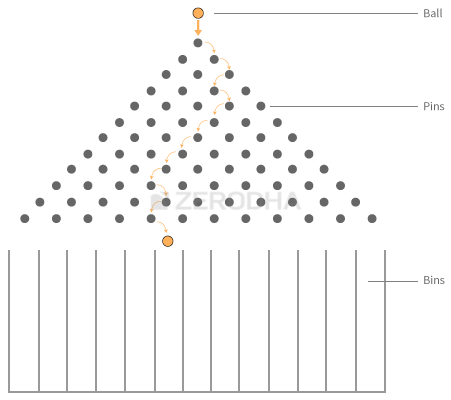<br>

The main exercise is to drop a ball from above the pins. Moment you drop a ball, and it encounters the first pin, after which the ball can either turn left or turn right (probability of each event is 50%) before it encounters another pin. The procedure repeats itself, until the ball falls into one of the bins. Once you drop the ball from top, the path that the ball takes is completely natural and cannot be defined. Therefore, the path that the ball takes is called the "Random Walk". Similarly, we always assume that the path a stock will take after a particular point is completely random and is independent of the past events or past action. So, whatever conclusions we will get from a galton board experiment, they will be applicable to a stock also.

Let's assume, we drop 10k balls one after the other. What do you think about the distribution of these balls in the bins ?

- Do they all fall in the same bin?
- Do they all get distributed equally across the bins?
- Do they randomly fall across the various bins?

Now, a naive person (not familiar with normal distribution) would think that the balls will fall randomly across the bins. But, there seems to be an order here. <br>

- Majority tend to fall in the central bin.
- Bins at the extreme ends have very few balls
- And there's a bell-shaped strucutre to the distribution of balls.

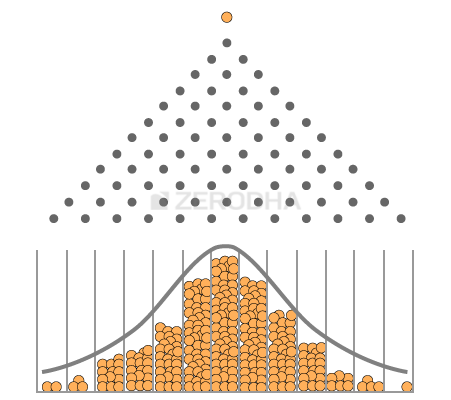<br>

And this is it, that bell shaped distribution of any sample or dataset is called <b>Normal Distribution</b>. 

<hr>

### What is Normal Distribution ?

Here's a formal definition of Normal Distribution: <b>A normal distribution or Gaussian distribution is a type of continuous probability distribution for a real-valued random variable that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. The normal distribution appears as a "bell curve" when plotted. </b>

In simple words, If I number the bins (from left to right) i.e. as 1,2,3...,9. The 5th bin is the average bin containing highest number of balls, and the spread out data of balls get decreasing and decreasing on both side of the 5th bin.  

The normal distribution has a set of characteristics that helps us develop insights into the data set. It can be described fully by two numbers - the mean (average) and the Standard deviation (spread of data). Here's the general theory aroung the normal distribution: 

- Within the 1st standard deviation one can observe 68% of the data.
- Within the 2nd standard deviation one can observe 95% of the data.
- Within the 3rd standard deviation one can observe 99.7% of the data.

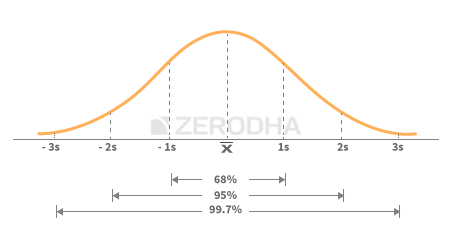

<hr>

### Returns as Normal Distribution

Let's take indian indices (NIFTY50, BANKNIFTY) and some stocks to see, how their weekly returns behave or distribute. I will use python to read data, resample it to weekly timeframe, calculate returns and then plot a histogram to visualize the distribution. Data included from `2016-01-01` to `2024-12-27`.

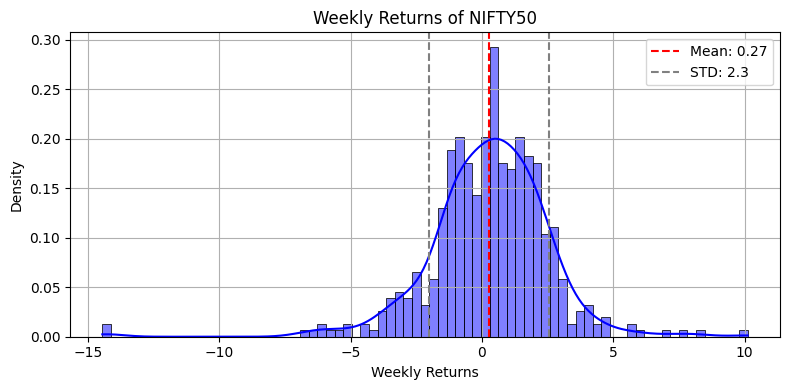

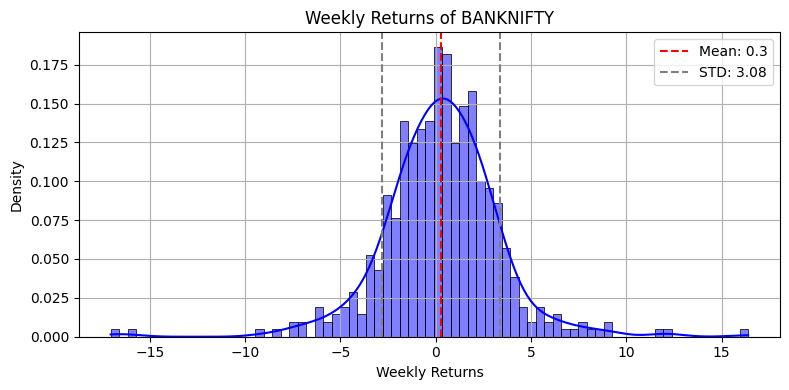

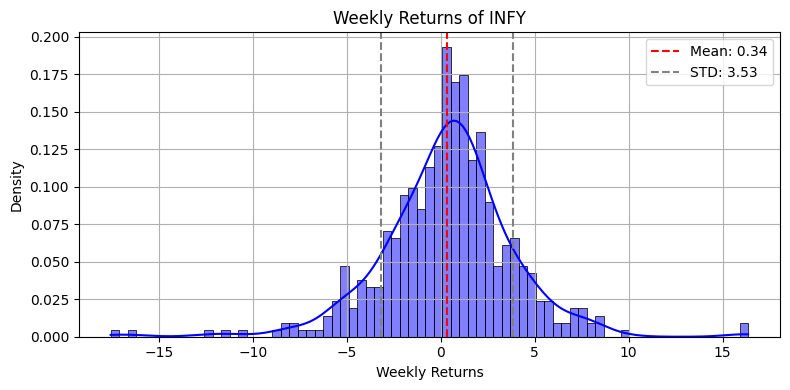

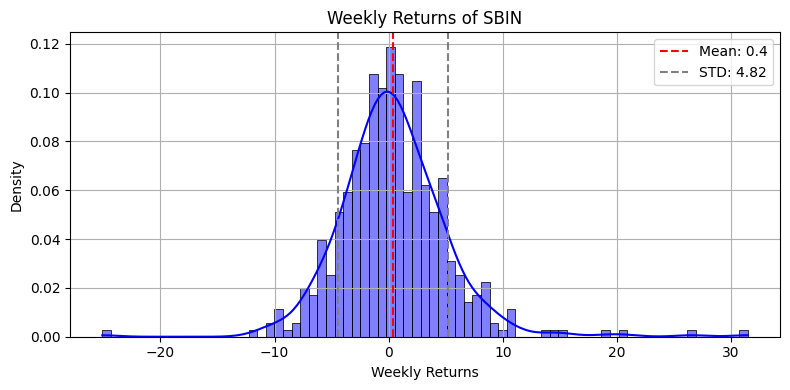

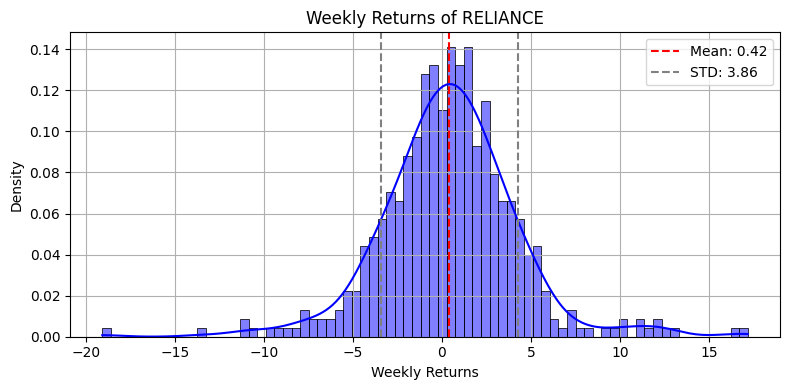

In [29]:
## Import Statements
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

## Folderpath and stock names
DATA_FOLDERPATH = "E:\\Market-Work\\All-Data\\Minute_Data-Stocks_Indices"
instrument_list = ["NIFTY50", "BANKNIFTY", "INFY", "SBIN", "RELIANCE"]

## Iterate on each instrument
for instrument in instrument_list:
	filepath = os.path.join(DATA_FOLDERPATH, instrument+".csv")
	df = pd.read_csv(filepath, usecols=["Date_time","Close"], index_col=0)
	## Resample to weekly
	df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")
	weekly_df = df.resample("W-THU").agg({"Close":"last"})
	weekly_returns = weekly_df["Close"].pct_change() * 100
	weekly_returns.dropna(inplace=True)
	returns_mean = weekly_returns.mean()
	returns_std = weekly_returns.std()
	## Plot the weekly returns
	plt.figure(figsize=(8, 4))
	sns.histplot(weekly_returns, bins=75, kde=True, stat="density", color="blue")
	plt.axvline(x=returns_mean, color="red", linestyle="--", label=f"Mean: {round(returns_mean, 2)}")
	plt.axvline(x=returns_mean+returns_std, color="grey", linestyle="--", label=f"STD: {round(returns_std, 2)}")
	plt.axvline(x=returns_mean-returns_std, color="grey", linestyle="--")
	plt.title(f"Weekly Returns of {instrument}")
	plt.xlabel("Weekly Returns")
	plt.ylabel("Density")
	plt.legend()
	plt.grid(True)
	plt.tight_layout()
	plt.show()
	plt.close()

We can see the weekly returns are normally distributed. I've also mentioned their respective average and standard deviations for reference. Now, We can easily calculate the mean - 1SD and mean + 1SD to get a range for weekly returns of the instrument. And, we can also attach a 68% confidence interval with that range of weekly returns. For example: In case of NIFTY50, the mean is 0.27% and std is 2.3%. So, the lower and upper weekly return boundaries are -2.03% to 2.27% respectively. I will explain a better approach to use this weekly range for a trading strategy or model.

<hr>

### Usage of Normal Distribution in Finance

1. Risk Management & VaR (Value at Risk):
- Many risk models assume returns are normally distributed to calculate the probability of extreme losses.
- Example: VaR estimates how much a portfolio could lose in a given timeframe with a certain probability (e.g., 5% VaR = 10,000 means a 5% chance of losing 10K in a day). Inversly, there's a 95% chance of not loosing it i.e. practically a 2SD level with 95% confidence interval.

2. Options Pricing & The Black-Scholes Model:
- The Black-Scholes Model assumes that stock returns follow a log-normal distribution for pricing options.
- Implied volatility calculations also depend on normal distribution assumptions.

3. Mean-Variance Portfolio Theory:
- MPT assumes that asset returns are normally distributed when calculating expected returns & portfolio optimization.
- Sharpe Ratio, used to measure risk-adjusted returns, is based on normal distribution logic.

4. Statistical Arbitrage & Quantitative Strategies:
- And now my favorite part, In many quantitative models we assume stock returns are normally distributed, and we use them to trigger trading signals.
- Example: Z-Score-based mean reversion strategies use normal distribution to identify overbought/oversold conditions.
- Example: Calculate the weekly returns over a specified lookback period say past 12 weeks (near to 3 months), and then calculate -1SD and +1SD levels for the index. We are concluding that the index will trade in the specified range with 68% confidence. Create a short strangle or a weekly iron condor around the specified trading range. I am currently trying to backtest this logic, with some added factors like ATR, Max Option Pain, and etc.

<hr>

### BONUS: Central Limit Theorem (CLT)

When independent random samples of a sufficiently large size are drawn from any population (regardless of its original distribution), the sampling distribution of the sample mean will tend to follow a normal distribution. In simple terms: No matter how a population is distributed (skewed, uniform, exponential, poisson, etc.), the distribution of the sample means will be approximately normal - if the sample size is large enough.

Example of CLT in Finance:
- Suppose we take daily returns of a stock for the past one year.
- The distribution of daily returns might be skewed due to large price movements or market shocks.
- However, if we take 100 different samples of 30-day average returns, the distribution of these sample means will be approximately normal.

<hr>

For more detailed explaination of Normal Distribution and its link with stock market, you can refer to: [Zerodha Varsity's Chapter](https://zerodha.com/varsity/chapter/volatility-normal-distribution/). A lot of the content and images in the document, is taken or inspired by the same article. I will definitely recommend to read all chapters of Zerodha Varisty Modules, that are gem !!

<hr>